In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import   seasonal_decompose
%matplotlib inline

In [2]:
df=pd.read_excel('Sales_Data.xlsx')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2018-02-24,828,Shipped,Motorcycles,95.0,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,2018-05-07,757,Shipped,Motorcycles,95.0,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,2018-07-01,703,Shipped,Motorcycles,95.0,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,2018-08-25,649,Shipped,Motorcycles,95.0,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168.0,36.0,96.66,1.0,3479.76,2018-10-28,586,Shipped,Motorcycles,95.0,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   float64       
 1   QUANTITYORDERED       2747 non-null   float64       
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   float64       
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2748 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   float64       
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [5]:
df1=pd.read_csv('dataset_group.csv')

In [6]:
df1.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [8]:
df.shape

(2748, 20)

In [45]:
df[['QUANTITYORDERED','PRICEEACH','SALES','DAYS_SINCE_LASTORDER','MSRP']].describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2748.0,1756.500364,819.706358,42.00,1077.000,1760.50,2436.250,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [47]:
df[df['DAYS_SINCE_LASTORDER']==42]['CUSTOMERNAME']

23    Euro Shopping Channel
Name: CUSTOMERNAME, dtype: object

In [50]:
df[df['SALES']==14082.80]['CUSTOMERNAME']

571    The Sharp Gifts Warehouse
Name: CUSTOMERNAME, dtype: object

In [51]:
df.duplicated().sum()

0

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


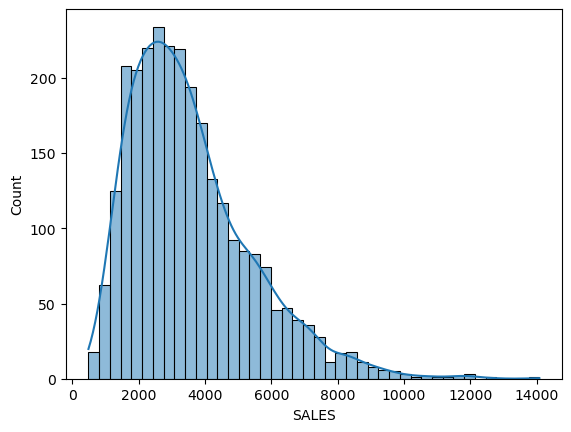

In [10]:
sns.histplot(data=df,x='SALES',kde=True);

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


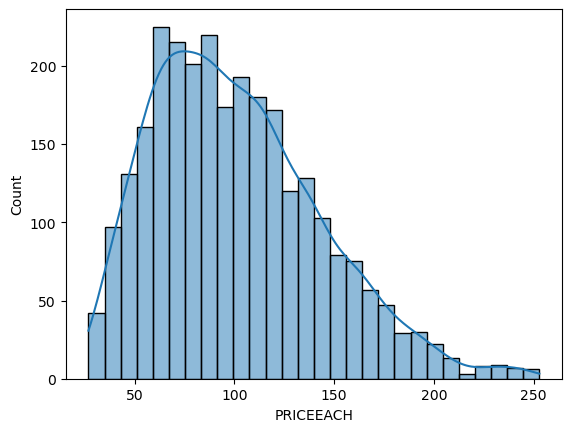

In [11]:
sns.histplot(data=df,x='PRICEEACH',kde=True);

C:\Users\Abubacker Siddhique\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


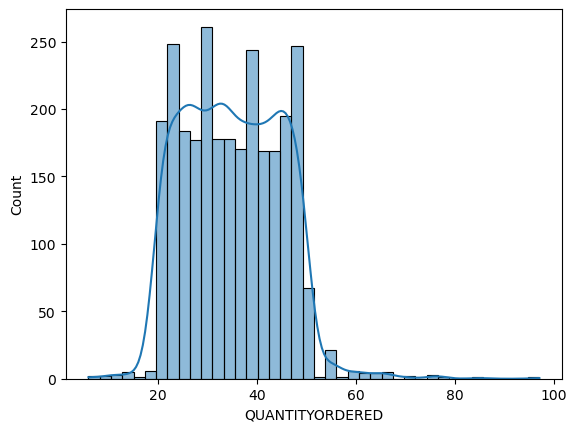

In [12]:
sns.histplot(data=df,x='QUANTITYORDERED',kde=True);

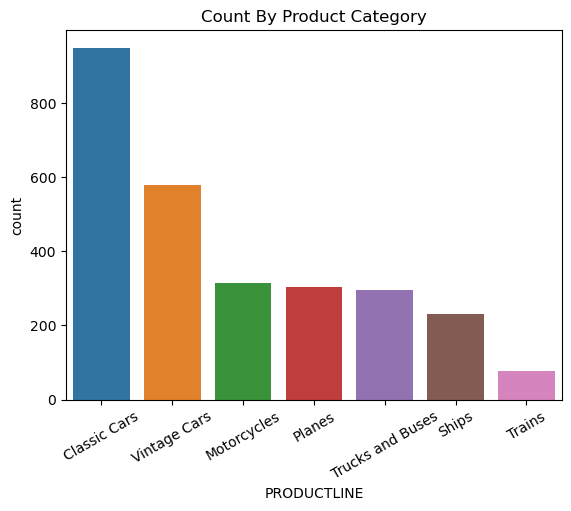

In [52]:
sns.countplot(data=df,x='PRODUCTLINE',order=df['PRODUCTLINE'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Count By Product Category');

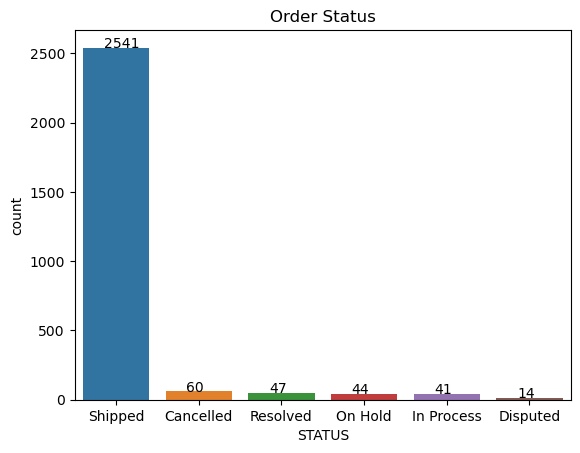

In [53]:
ax=sns.countplot(data=df,x='STATUS',order=df['STATUS'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Order Status');


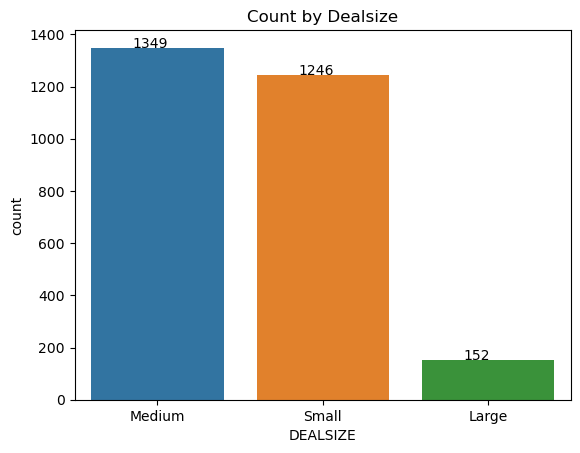

In [54]:
ax=sns.countplot(data=df,x='DEALSIZE',order=df['DEALSIZE'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Count by Dealsize');


In [16]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

COUNTRY
USA          3355575.69
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64

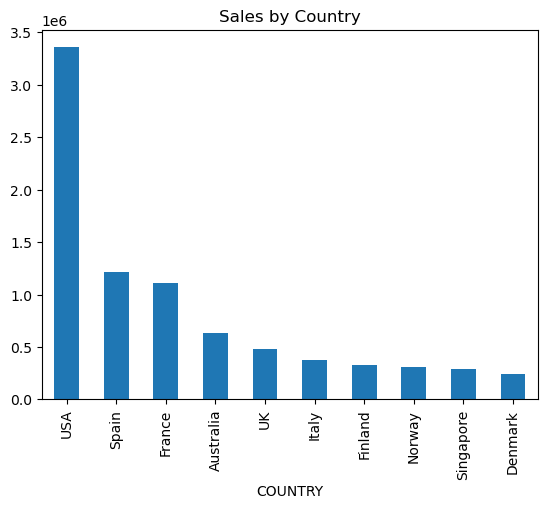

In [61]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Sales by Country');


In [75]:
df['SALES'].sum()

9760221.71

In [76]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10).sum()

8337528.17

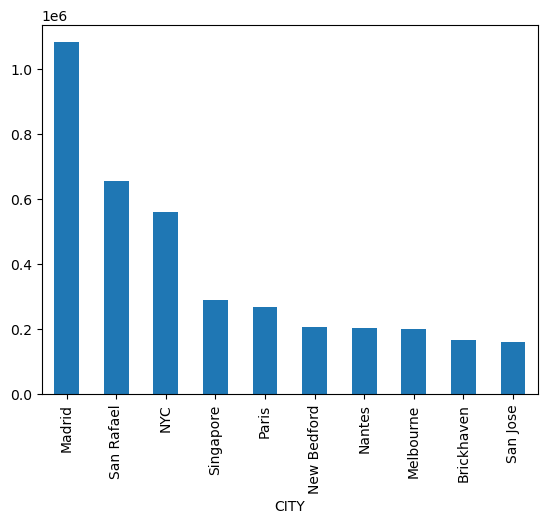

In [18]:
df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar');

In [79]:
df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(1).sum()

1082551.44

In [80]:
df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(5).sum()

2855630.3600000003

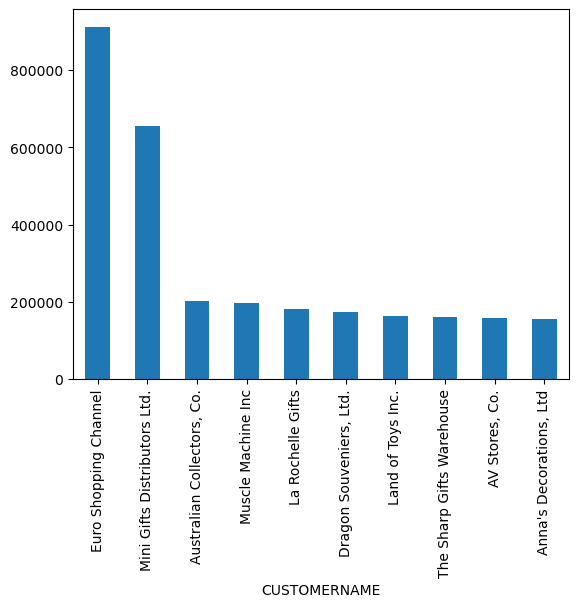

In [19]:
df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar');

In [81]:
df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(2).sum()

1567152.17

In [20]:
df['Month']=df['ORDERDATE'].dt.month_name().str.slice(stop=3)

In [21]:
df['Year']=df['ORDERDATE'].dt.year

In [22]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Month,Year
0,10107.0,30.0,95.70,2.0,2871.00,2018-02-24,828,Shipped,Motorcycles,95.0,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,Feb,2018.0
1,10121.0,34.0,81.35,5.0,2765.90,2018-05-07,757,Shipped,Motorcycles,95.0,...,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,May,2018.0
2,10134.0,41.0,94.74,2.0,3884.34,2018-07-01,703,Shipped,Motorcycles,95.0,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Jul,2018.0
3,10145.0,45.0,83.26,6.0,3746.70,2018-08-25,649,Shipped,Motorcycles,95.0,...,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,Aug,2018.0
4,10168.0,36.0,96.66,1.0,3479.76,2018-10-28,586,Shipped,Motorcycles,95.0,...,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,Oct,2018.0


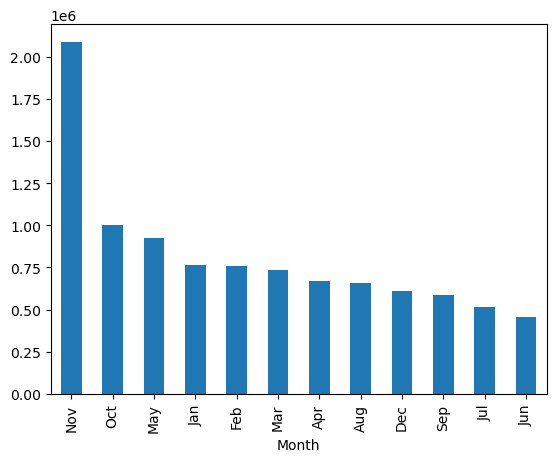

In [23]:
df.groupby('Month')['SALES'].sum().sort_values(ascending=False).plot(kind='bar');

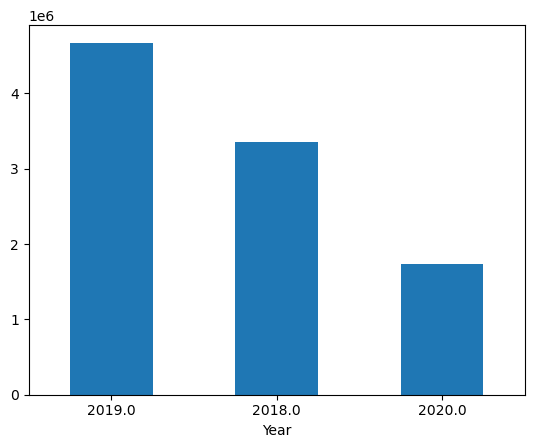

In [24]:
df.groupby('Year')['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=360);

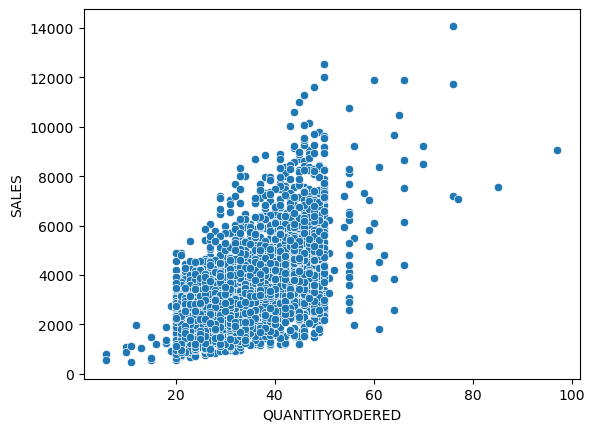

In [25]:
sns.scatterplot(data=df,x='QUANTITYORDERED',y='SALES');

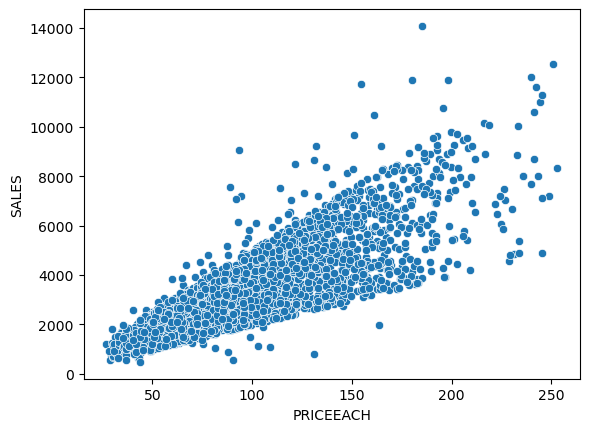

In [26]:
sns.scatterplot(data=df,x='PRICEEACH',y='SALES');

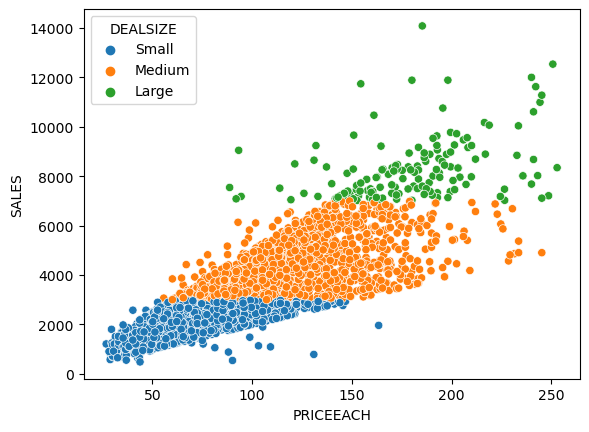

In [27]:
sns.scatterplot(data=df,x='PRICEEACH',y='SALES',hue='DEALSIZE');

C:\Users\Abubacker Siddhique\AppData\Local\Temp\ipykernel_21320\2303639940.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x='DEALSIZE',y='SALES',ci=False);


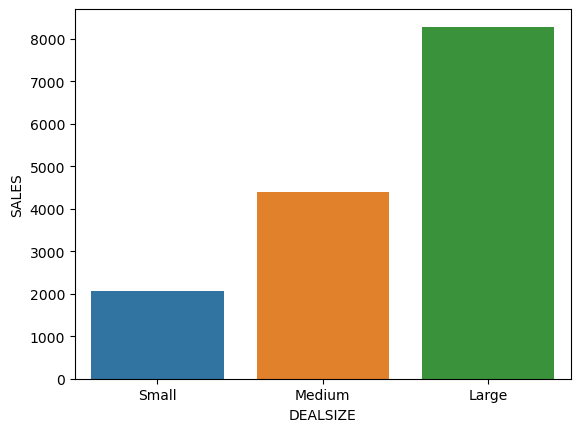

In [28]:
sns.barplot(data=df,x='DEALSIZE',y='SALES',ci=False);

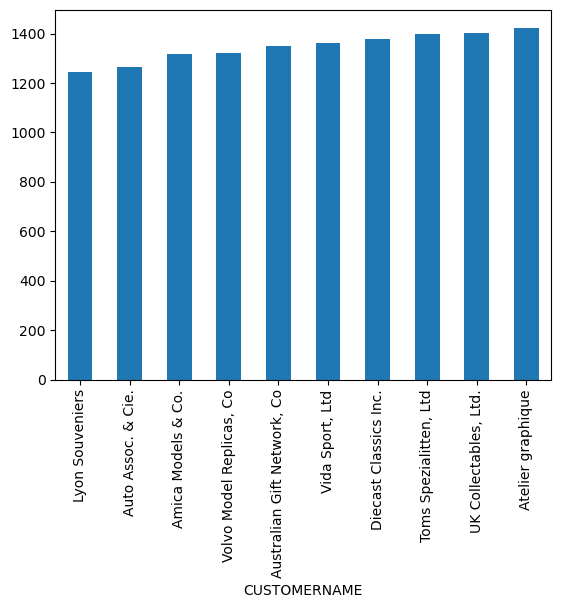

In [57]:
df.groupby('CUSTOMERNAME')['DAYS_SINCE_LASTORDER'].mean().sort_values(ascending=True).head(10).plot(kind='bar');

In [60]:
df[df['CUSTOMERNAME']=='Lyon Souveniers']['SALES'].sum()

78570.34

In [30]:
status= round(pd.crosstab(df['DEALSIZE'], df['STATUS'], normalize = 'index')*100, 2)
status

STATUS,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped
DEALSIZE,,,,,,
Large,0.00,3.29,1.97,3.29,0.66,90.79
Medium,2.45,0.37,1.33,1.78,1.93,92.14
Small,2.17,0.32,1.61,1.20,1.61,93.10


In [31]:
df.duplicated().sum()

0

In [32]:
df1.duplicated().sum()

4730

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [34]:
df1['Date']=pd.to_datetime(df1['Date'],dayfirst=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [36]:
df1['Month']=df1['Date'].dt.month_name().str.slice(stop=3)

In [37]:
df1['Year']=df1['Date'].dt.year

In [38]:
df1.head()

,Date,Order_id,Product,Month,Year
0,2018-01-01,1,yogurt,Jan,2018
1,2018-01-01,1,pork,Jan,2018
2,2018-01-01,1,sandwich bags,Jan,2018
3,2018-01-01,1,lunch meat,Jan,2018
4,2018-01-01,1,all- purpose,Jan,2018
